# Project 2

In this project, you will implement the exploratory analysis plan developed in Project 1. This will lay the groundwork for our our first modeling exercise in Project 3.

### Step 1: Load the python libraries you will need for this project 

In [39]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pylab as pl
import numpy as np
%matplotlib inline

### Step 2: Read in your data set 

In [40]:
#Read in data from source 
df = pd.read_csv("admissions.csv")
print df.head()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Questions
#### Question 1. How many observations are in our dataset? 


In [41]:
df.count()
df.shape

(400, 4)

Answer: 400

#### Question 2. Create a summary table

In [45]:
stats = df.describe()

print stats

            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000    4.00000    4.000000


#### Question 3. Why would GRE have a larger STD than GPA?

Answer: the range of values is much larger in GRE than GPA

#### Question 4. Drop data points with missing data


In [32]:
print len(df)

print df.isnull().sum()

df.dropna(axis=0, how='any')

print len(df) - len(df.dropna())

print len(df.dropna())


400
admit       0
gre         2
gpa         2
prestige    1
dtype: int64
3
397


#### Question 5. Confirm that you dropped the correct data. How can you tell? 

Answer: there are 3 rows dropped and there should be 397 remaining, and len(df.dropna()) shows as such

#### Question 6. Create box plots for GRE and GPA

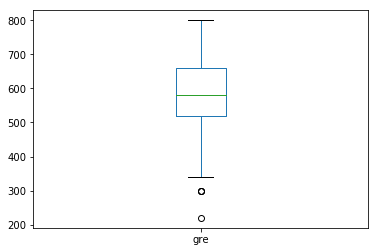

In [33]:
#boxplot gre
df['gre'].plot(kind='box')


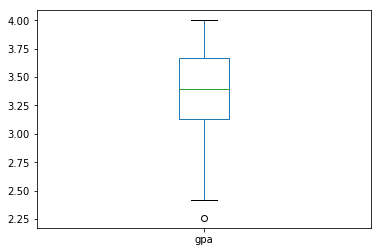

In [34]:
#boxplot gpa
df['gpa'].plot(kind='box')


#### Question 7. What do this plots show?

Answer: an easy to read 5 number summary - min, Q1, median, Q3, Max


#### Question 8. Describe each distribution 

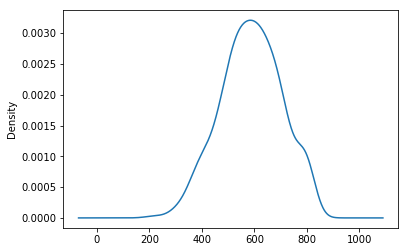

In [35]:
# plot the distribution of each variable 

#gre 
df['gre'].plot(kind='density')


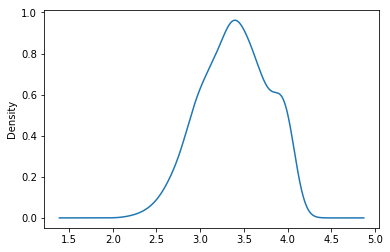

In [36]:
# plot the distribution of each variable 

#gpa 
df['gpa'].plot(kind='density')


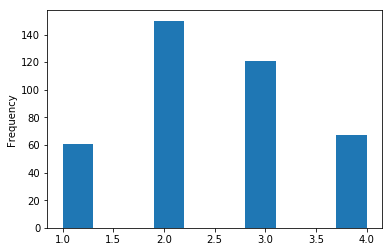

In [37]:
# plot the distribution of each variable 

#prestige
df['prestige'].plot(kind='hist')


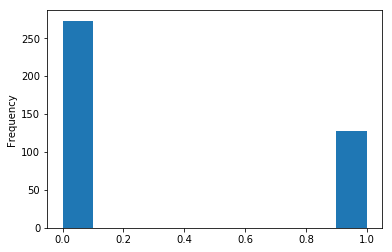

In [38]:
# plot the distribution of each variable 

#admit 
df['admit'].plot(kind='hist')


#### Question 9.  If our model had an assumption of a normal distribution would we meet that requirement? 

Answer: looking at gre and gpa distributions, one might want to say yes these are close to normal however there are slight bumps in the distributions and not symmetrical about the mean.

#### Question 10.  Does this distribution need correction? If so, why? How? 

In [19]:
print df.skew()
print df.kurt()

admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64
admit      -1.387513
gre        -0.330065
gpa        -0.574623
prestige   -0.894759
dtype: float64


Answer: there is some skewness and kurtosis to both gre and gpa distributions

#### Question 11. Which of our variables are potentially colinear? 

In [26]:
# create a correlation matrix for the data
print df.corr()

print df.cov()


             admit       gre       gpa  prestige
admit     1.000000  0.182919  0.175952 -0.241355
gre       0.182919  1.000000  0.382408 -0.124533
gpa       0.175952  0.382408  1.000000 -0.059031
prestige -0.241355 -0.124533 -0.059031  1.000000
             admit           gre        gpa   prestige
admit     0.217237      9.871271   0.031191  -0.106189
gre       9.871271  13369.953040  16.824761 -13.648068
gpa       0.031191     16.824761   0.144879  -0.021260
prestige -0.106189    -13.648068  -0.021260   0.893654


#### Question 12. What did you find?

Answer: correlation coefficients look weak for each variable being compared (unless to itself).  gre and gpa have the strongest correlation at 0.38.  

#### Question 13. Write an analysis plan for exploring the association between grad school admissions rates and prestige of  undergraduate schools.

Answer: 
1. identify the problem, in this case we want to know if there is a way to predict admission based on undergraduate school prestige
2. prepare the data
3. use visual displays and numberical summaries
4. describe overall patterns and point out and deviations
5. interpret results in context

#### Question 14. What is your hypothesis? 

Answer: prestige of undergraduate school is not likely related to graduate school admission

## Bonus/Advanced

#### 1. Bonus: Explore alternatives to dropping obervations with missing data

#### 2. Bonus: Log transform the skewed data

#### 3. Advanced: Impute missing data